# Import packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Read data

In [ ]:
!mkdir data && curl -o data/adult.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson03/notebooks/data/adult.data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3436k  100 3436k    0     0  2946k      0  0:00:01  0:00:01 --:--:-- 62.4M


In [ ]:
df_data = pd.read_csv("data/adult.csv")

In [ ]:
df_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Check data

In [ ]:
df_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
df_data["native-country"].value_counts().index[0]

'United-States'

In [ ]:
df_data["salary"].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [ ]:
df_data = df_data.drop(['fnlwgt', 'education-num'], axis = 1) 

In [ ]:
col_names = df_data.columns

# Check Nulls and replace values

In [ ]:
for c in col_names: 
    df_data = df_data.replace("?", np.NaN) 
df_data = df_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Encoding

In [ ]:
category_col =['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
               'race', 'sex', 'native-country', 'salary']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df_data[col] = labelEncoder.fit_transform(df_data[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'workclass': {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}, 'education': {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}, 'marital-status': {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}, 'occupation': {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}, 'relationship': {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}, 'ra

# Exploratory Data Analysis

Text(0.5, 1.0, '<=50K Income vs >50K Income Count')

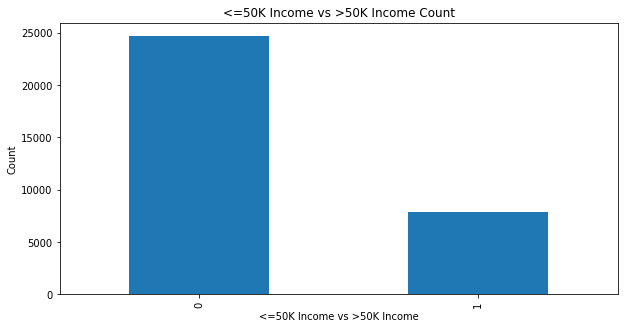

In [ ]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = df_data.salary.value_counts().plot(kind = 'bar')
plt.xlabel("<=50K Income vs >50K Income")
plt.ylabel("Count")
plt.title("<=50K Income vs >50K Income Count")

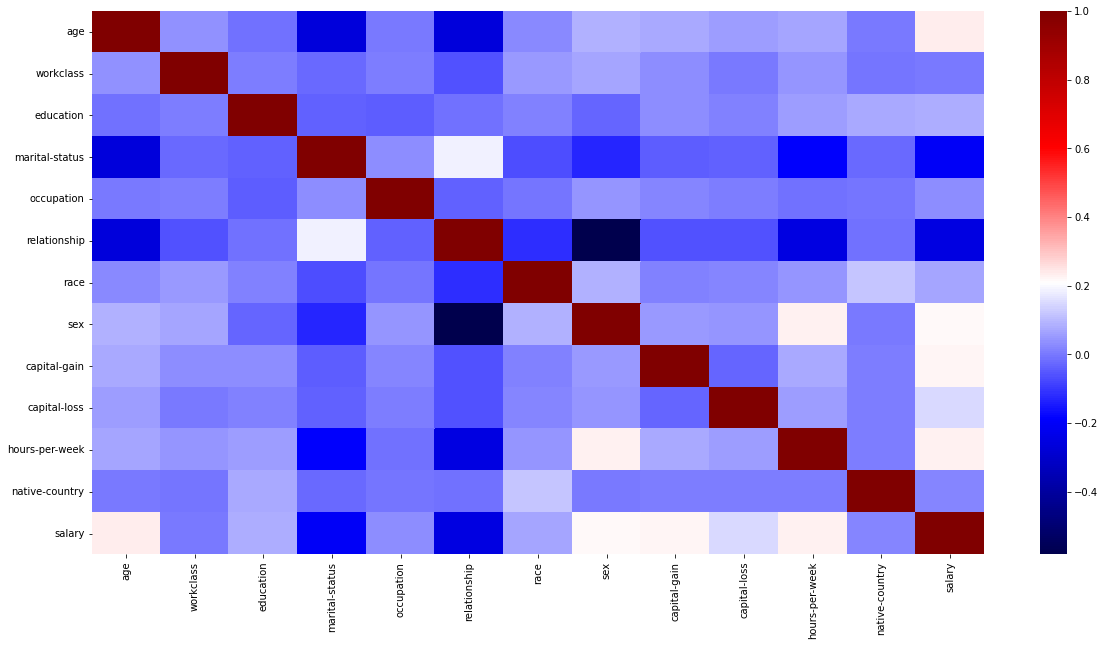

In [ ]:
# Heatmap to find any high correlations
plt.figure(figsize=(20,10))
sns.heatmap(data=df_data.corr(), cmap="seismic")
plt.show()

# Label Data

In [ ]:
X = df_data.drop('salary', axis = 1) 
Y = df_data['salary']

# Split into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

# Train & Test Data using Random Forest 

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred)
print("Threshold:", rf_threshold)

[[6854  574]
 [ 871 1470]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7428
           1       0.72      0.63      0.67      2341

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

Accuracy Score: 0.8520831200737026
Recall Score: 0.6279367791542076
Precision Score: 0.7191780821917808
ROC AUC Score:  0.7753308020703725
Threshold: [2 1 0]


# ROC Curve

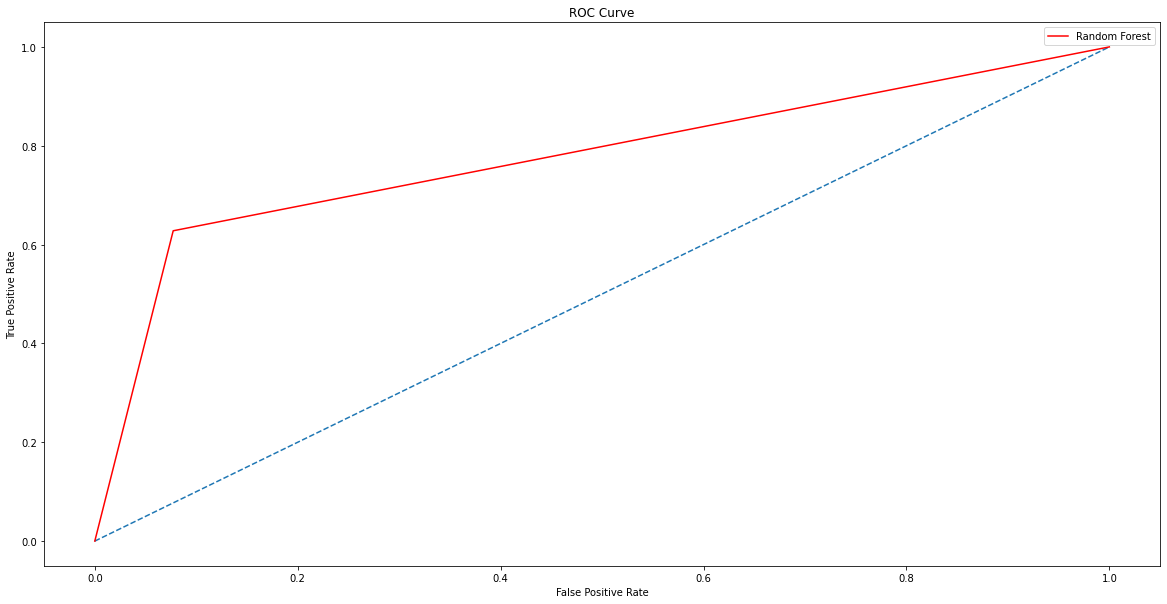

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(rf_fp, rf_tp, color="red", label = "Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Get most important features and their contribution in model

In [ ]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
0,age,0.227033
8,capital-gain,0.131432
10,hours-per-week,0.114191
5,relationship,0.109269
2,education,0.104456
4,occupation,0.092269
3,marital-status,0.074150
1,workclass,0.049487
9,capital-loss,0.045697
11,native-country,0.019805


Text(0.5, 1.0, 'Plot Feature Importances')

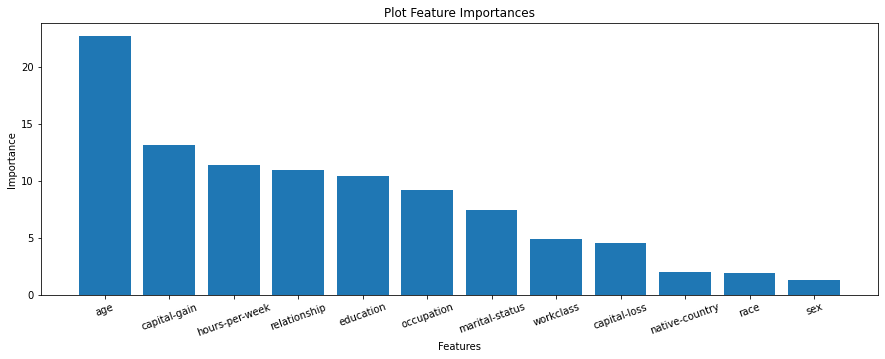

In [ ]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

# Save the model

In [ ]:
pickle_out = open("model_rf.pkl", "wb")
pickle.dump(rf, pickle_out)
pickle_out.close()